# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders= pd.read_csv("/datasets/instacart_orders.csv",sep=";")
df_products=pd.read_csv("/datasets/products.csv",sep=";")
df_aisles=pd.read_csv("/datasets/aisles.csv",sep=";")
df_departments=pd.read_csv("/datasets/departments.csv",sep=";")
df_order_products=pd.read_csv("/datasets/order_products.csv",sep=";")

In [3]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Respecto a la descripcion de cada DataFrame cada uno en un principio contenian una sola columna y cada fila estaban separadas por ';' ya que como sabemos los archivos '.CSV' significa valores separados por comas, por lo tanto tuvimos que agregar el parametro 'sep' en la lectura de los archivos con el valor ";" para separar las columnas y los datos de las filas respectivamente para tener DataFrames que seran mas facil de trabajar durante el proyecto. Se tuvo que tener en cuenta que 'order_products.csv' contiene muchas filas de datos y cuando un DataFrame tiene demasiadas filas, 'info()' no imprimirá los recuentos no nulos por defecto, por lo que si queremos imprimir los recuentos no nulos, se tiene que incluir el 'show_counts=True' cuando llamamos a 'info()' y asi saber si tenemos datos faltantes

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos

## Plan de solución


Se realiza el procesamiento de datos, primero que si sabemos que trabajamos con numeros enteros no es necesario dejar todo en minusculas, ademas vemos que hay datos que estan como float pero visualizando los datos se puede dejar como entero,  luego identificaremos los duplicados y eliminaremos, terminando con el rellenado de valores ausentes por un valor predeterminado.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().value_counts())
duplicated=df_orders[df_orders.duplicated() ==True]
print(duplicated)

False    478952
True         15
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Tienen en comun todos sus valores en las columnas "order_dow" (3=Miercoles) y "order_hour_of_day"

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(df_orders[(df_orders["order_dow"] ==3)&(df_orders["order_hour_of_day"] ==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Se hicieron 121 ordenes los dias miércoles a las 2:00 a.m pero sabemos que de estos 121 ordenes 15 fueron repetidas

In [10]:
# Elimina los pedidos duplicados
df_orders=df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().value_counts())

False    478952
dtype: int64


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders["order_id"].duplicated().value_counts())

False    478952
Name: order_id, dtype: int64




Todos los datos duplicados coincidian en la hora del dia que fue pedido (2:00 a.m) y el dia que se hizo la orden (3=miercoles) por ende fueron eliminados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().value_counts())

False    49694
dtype: int64


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print(df_products["product_id"].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_products["product_name"].duplicated().sum())

1257


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicated=df_products[df_products["product_name"].duplicated() ==True]
print(duplicated)

       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]




En primer lugar verificamos si habian filas duplicadas en el DataFrame y por 'product_id', pero como no habian buscamos, en una columna donde es propenso encontrar datos duplicados, donde dejamos todos los datos en mayusculas para encontrar todos los datos duplicados posibles y los eliminamos.


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().value_counts())

False    21
dtype: int64


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments["department_id"].duplicated().value_counts())
print(df_departments.nunique())

False    21
Name: department_id, dtype: int64
department_id    21
department       21
dtype: int64




Podemos verificar que no tenemos filas duplicadas y lanzamos un nunique() para contar los datos unicos

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().value_counts())

False    134
dtype: int64


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles["aisle_id"].duplicated().value_counts())
print(df_aisles.nunique())

False    134
Name: aisle_id, dtype: int64
aisle_id    134
aisle       134
dtype: int64




Podemos verificar que no tenemos filas duplicadas y lanzamos un nunique() para contar los datos unicos

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().value_counts())

False    4545007
dtype: int64


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
for i in df_order_products.columns.values:
    print(df_order_products[i].duplicated().value_counts())
    print()

True     4094961
False     450046
Name: order_id, dtype: int64

True     4499434
False      45573
Name: product_id, dtype: int64

True     4544942
False         65
Name: add_to_cart_order, dtype: int64

True     4545005
False          2
Name: reordered, dtype: int64





Realizamos un ciclo for para realizar un conteo de los valores repetidos pero en cada columna por separado demostrado que si contamos con valores duplicados.


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products[df_products["product_name"].isnull()==True])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


 

Tenemos 1258 filas donde el valor de la columna "product_name" estan ausentes

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[(df_products["product_name"].isnull()==True)&(df_products["aisle_id"]==100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]




Efectivamente todos los nombres de productos faltantes estan relacionados con el pasillo de ID 100, lo sabemos ya que realizamos una busqueda de datos ausentes en la columna "product_name" y su vez en la columna "aisle_id" donde sea el valor 100 con ayuda de 2 condiciones, si observamos el numero de filas (1258) no cambia de la busqueda anterior por lo que podemos concluir que la hipotesis es correcta.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[(df_products["product_name"].isnull()==True)&(df_products["department_id"]==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]




Efectivamente todos los nombres de productos faltantes estan relacionados con el departamento de ID 21, lo sabemos ya que realizamos una busqueda de datos ausentes en la columna "product_name" y su vez en la columna "department_id" donde sea el valor 21 con ayuda de 2 condiciones, si observamos el numero de filas (1258) no cambia respecto a la primera busqueda por lo que podemos concluir que la hipotesis es correcta.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Revisemos la tabla department:")
print(df_departments[df_departments["department_id"]==21])
print()
print("Revisemos la tabla aisle:")
print(df_aisles[df_aisles["aisle_id"]==100])

Revisemos la tabla department:
    department_id department
20             21    missing

Revisemos la tabla aisle:
    aisle_id    aisle
99       100  missing




Podemos ver que los valores del departamento (department) 21 y el pasillo (aisle) 100 no son valores ausentes pero si tienen una cadena (string) que nos indica que esta perdido. 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"]=df_products["product_name"].fillna("Unknown")
print(df_products[df_products["product_name"].isnull()==True])
print(df_products[df_products["product_name"]=="Unknown"])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]




Podemos verificar en el primer print() que ya no hay datos ausentes en la columna "product_name" y luego imprimimos las filas de la columna "product_name" donde el valor sea el String "Unknown" para verificar que las 1258 filas que anteriormente eran valores ausentes cambiaron su valor correctamente

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_orders.isna().value_counts())

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              False                     450135
                                                               True                       28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[df_orders["order_number"]!=1].isna().value_counts())

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              False                     450135
dtype: int64



No ha valores ausentes en ninguna columna en el DataFrame "df_orders" por excepcion de la columna "day_since_prior_order" donde tenemos 28817 valores ausentes

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_order_products.isna().value_counts())

order_id  product_id  add_to_cart_order  reordered
False     False       False              False        4544171
                      True               False            836
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Los valores minimos en cada columna de df_order_products:")
print(df_order_products["add_to_cart_order"].min())
print()
print("Los valores maximos en cada columna de df_order_products:")
print(df_order_products["add_to_cart_order"].max())

Los valores minimos en cada columna de df_order_products:
1.0

Los valores maximos en cada columna de df_order_products:
64.0



Una columna relevante para esta funcion es saber que hubo una orden que agrego 64 productos como maximo y otra orden que agrego como minimo 1 producto permitiendo conocer el carro mas grande del DataFrame

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_null_cart_order=df_order_products[df_order_products["add_to_cart_order"].isnull()==True]
print(id_null_cart_order)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
id_null_orders_products=df_order_products[df_order_products.order_id.isin(id_null_cart_order["order_id"])]
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
group_id_orders_products=id_null_orders_products.groupby(["order_id"])
print("Conteo de 'product_id':")
print(group_id_orders_products["product_id"].count())
print("Conteo minimo de 'product_id':")
print(group_id_orders_products["product_id"].count().min())

Conteo de 'product_id':
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64
Conteo minimo de 'product_id':
65




Podemos ver en un principio que solo tenemos 836 valores ausentes en la columna "add_to_cart_order" y que minimo hemos tenido 1 producto en el carrito y como maximo 64 productos en un carrito y tomando las order_id de con valores ausentes en la columna " add_to_cart_order" podemos obervar que todos los pedidos con valores ausentes tienen mas de 64 pedidos agregados al carrito.
 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products["add_to_cart_order"]=df_order_products["add_to_cart_order"].fillna(999)
df_order_products["add_to_cart_order"]=df_order_products["add_to_cart_order"].astype("int")
df_order_products.info()
print(df_order_products.isna().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
order_id  product_id  add_to_cart_order  reordered
False     False       False              False        4545007
dtype: int64




Podemos comprobar que despues de rellenar los varloes ausentes con el valor 999, eso si yo hubiese decidido hacerlo por un valor de 1 ya que sabemos que se creo un carrito de compra por lo que tenemos minimo un producto pero rellenar los valores ausentes con 999 puede dañar la toma de decisiones, pero bueno, ya no tenemos valores ausentes y convertimos la columna "add_to_cart_order" de float a int

## Conclusiones


Hubieron muchos ejercicios (Notas en el lenguaje de programacion) que no entendi su proposito y gracias a su revision pude comprender mucho mejor pero si puedo concluir que los datos faltan procesar ya que no se pidio eliminar ausentes y duplicados en algunos DatasFrames


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil 

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
def values_range_of_columns(dataframe,name_column,value_min,value_max):
    if dataframe[(dataframe[name_column]>=value_min)&(dataframe[name_column]<=value_max)].empty==False:
        return "Rango de oscilacion es correcto"
    else:
        return "Rango de oscilacion es incorrecto"

In [36]:
print("La columna 'order_hour_of_day' tiene los valores correctos:",values_range_of_columns(df_orders,"order_hour_of_day",0,23))
print("La columna 'order_hour_of_day' tiene los valores correctos:",values_range_of_columns(df_orders,"order_dow",0,6) )

La columna 'order_hour_of_day' tiene los valores correctos: Rango de oscilacion es correcto
La columna 'order_hour_of_day' tiene los valores correctos: Rango de oscilacion es correcto




Se realizo una funcion que toma como parametros el dataframe, el nombre de la columna, los valores maximos y minimos para la oscilacion donde si la condicion con el metodo 'empty' es falsa, osea que si existin filas con los valores de las condiciones retornara una cadena diciendo que el rango de oscilacion es correcto, en caso contrario, se retornara una cadena que de a entender que el rango de oscilsacion es incorrecto

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

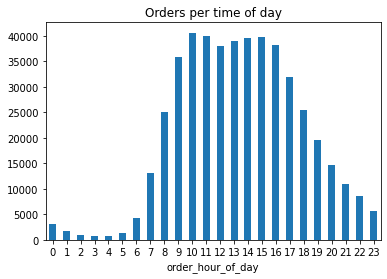

In [37]:
orders_per_time_of_day=df_orders.pivot_table(index="order_hour_of_day",values="order_id",aggfunc="count")
orders_per_time_of_day.plot(title="Orders per time of day",kind="bar",y="order_id",rot=0,legend=False)
plt.show()


Podemos observar que la hora con menos ordenes realizadas son a las 4 horas y en la hora que mas ordenes son pedidas es a las 10 horas, podemos detectar un patron que entre las 0 y las 6 horas son las horas que menos ordenes son pedidas, pero el aumento de ordenes entre las 7 y las 21 horas son altos a cada hora, luego entre lasa 10 y 16 horas el flujo de ordenes se mantiene alto pero empieza a disminuir desde las 17 hasta las 24 horas

### [A3] ¿Qué día de la semana compran víveres las personas?

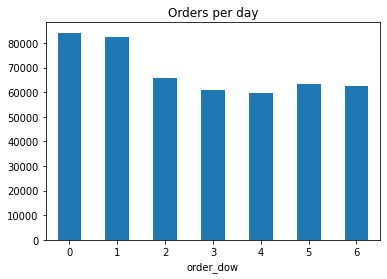

In [38]:
orders_per_day=df_orders.pivot_table(index="order_dow",values="order_id",aggfunc="count")
orders_per_day.plot(title="Orders per day",kind="bar",y="order_id",rot=0,legend=False)
plt.show()



Los dias que las personas realizan mas sus compras de viveres es el dia 0 (Domingo) y 1 (Lunes)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

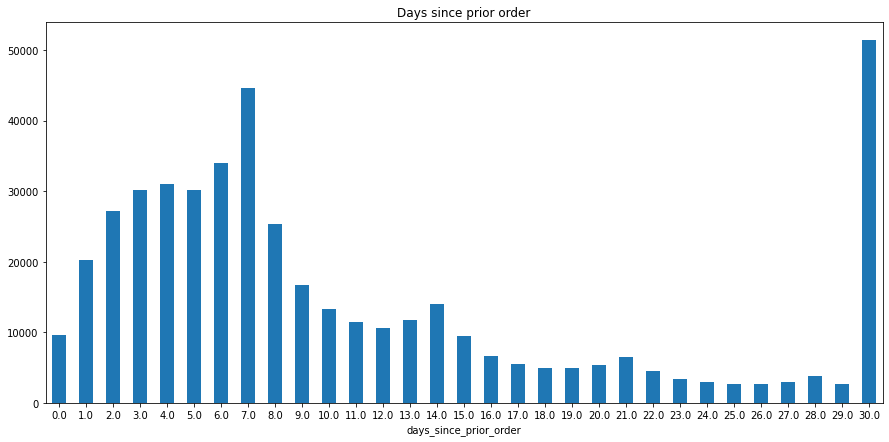

In [39]:
days_since_prior_order=df_orders.pivot_table(index="days_since_prior_order",values="order_id",aggfunc="count")
days_since_prior_order.plot(title="Days since prior order",kind="bar",y="order_id",rot=0,legend=False,figsize=[15,7])
plt.show()



Podemos ver que la gente pide minimo un pedido por mes ya que podemos ver que esperan maximo 30 dias para su proximo pedido. pero son alrederdor de 10000 personas que en menos de un dia realizar otro pedido.

# [B] Intermedio

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
#Filtramos los dias solicitados
order_per_day_filterd=df_orders[(df_orders["order_dow"]==3)|(df_orders["order_dow"]==6)]

In [41]:
#Creamos una tabla pivote que sera la que graficaremos
pivot_oder_per_day=order_per_day_filterd.pivot_table(index="order_hour_of_day",columns="order_dow",values="order_id",aggfunc="count")

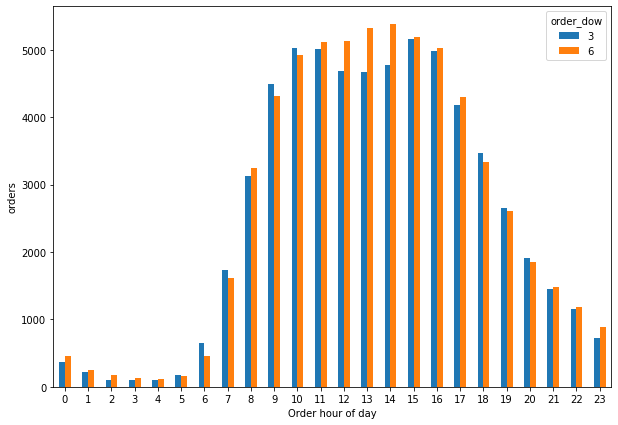

In [42]:

pivot_oder_per_day.plot(kind="bar",alpha=1,xlabel="Order hour of day",ylabel="orders",figsize=[10,7],rot=0)
plt.show()



Podemos concluir que en comparacion el dia miercoles en la mayoria de veces se realizan menos pedidos pero las diferencias desde una vista general es que en el dia sabado se realizan mucho mas pedidos que el dia miercoles entre las 12 y 15 horas

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

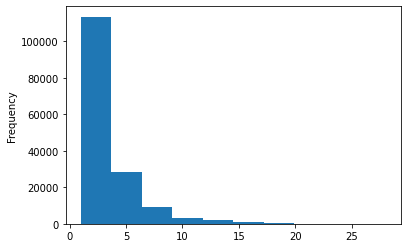

In [43]:
orders_per_client=df_orders["user_id"].value_counts()
orders_per_client.plot(kind="hist")
plt.show()



Podemos ver por la distribucion del histograma que la mayoria de usuarios solo realizan solo 1 pedido, y pocos llegan a superar los 15 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
order_products_and_products=df_order_products.merge(df_products)

In [45]:
order_products_and_products=order_products_and_products.groupby(["product_id","product_name"])
popular_products=order_products_and_products["order_id"].count()
print(popular_products.sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64




El producto mas popular es el platano con 66050 ordenes

# [C] Difícil

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
pivot_order_products=df_order_products.pivot_table(index="order_id",aggfunc="count")
pivot_order_products=pivot_order_products["product_id"].value_counts().sort_index()


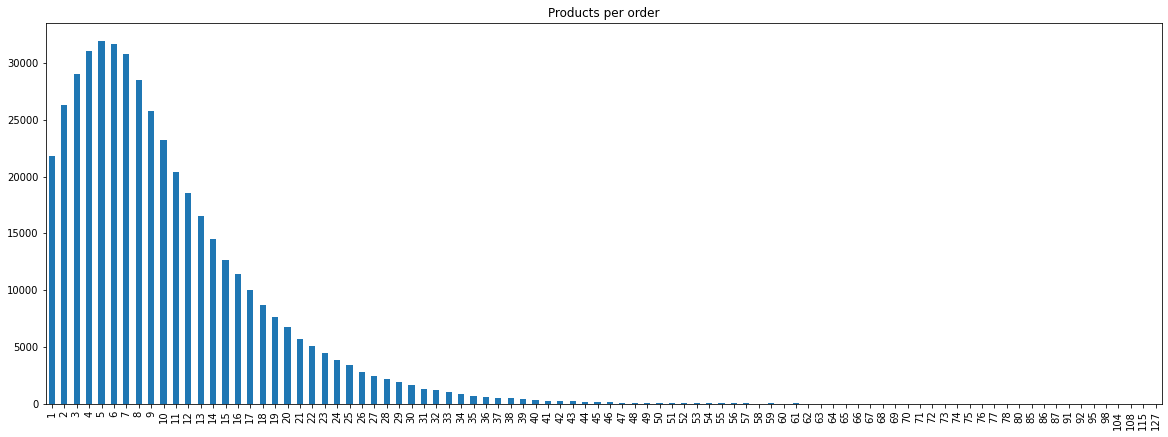

In [47]:
pivot_order_products.plot(kind="bar",xlim=(0,30),title="Products per order",figsize=(20,7))
plt.show()


Las personas por pedidos normalmente compran entre

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
order2_products_and_products=df_order_products.merge(df_products)

In [49]:
group_products=order2_products_and_products[order2_products_and_products["reordered"]==1].groupby(["product_id","product_name"])

In [50]:
popular_products_reordered=group_products["order_id"].count()
print(popular_products_reordered.sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64




Los produtcos que mas se vuelven a solicitar son frutas, en su mayoria, cuando  son productos organicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
group_products_reordered=df_order_products.pivot_table(index="product_id",values="reordered",aggfunc="mean")

In [52]:
print(group_products_reordered)

            reordered
product_id           
1            0.564286
2            0.000000
3            0.738095
4            0.510204
7            0.500000
...               ...
49690        0.800000
49691        0.430556
49692        0.416667
49693        0.440000
49694        0.333333

[45573 rows x 1 columns]


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [53]:
order_and_products=df_orders.merge(df_order_products)
order_and_products=order_and_products.groupby("user_id")
order_and_products_reordered=order_and_products["reordered"].mean()
print("Clientes elegidos al azar")
print(order_and_products_reordered.sample(10))
print()
print("Primeros y ultimos clientes")
print(order_and_products_reordered.sort_values(ascending=False))

Clientes elegidos al azar
user_id
38341     0.785714
6280      0.135135
167781    0.000000
159883    0.647059
190417    0.000000
21679     0.777778
173631    0.260870
149109    0.000000
33884     0.625000
90910     0.600000
Name: reordered, dtype: float64

Primeros y ultimos clientes
user_id
137587    1.0
173474    1.0
13918     1.0
62300     1.0
62307     1.0
         ... 
190953    0.0
119371    0.0
63173     0.0
63163     0.0
165726    0.0
Name: reordered, Length: 149626, dtype: float64




Podemos ver que los cliente por media tienden a repetir sus productos aun que hay clientes quienes repiten todos sus productos como tambien hay que no.


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [54]:
order2_products_and_products=df_order_products.merge(df_products)
group_products=order2_products_and_products[order2_products_and_products["add_to_cart_order"]==1].groupby(["product_id","product_name"])

In [55]:
popular_products_reordered=group_products["order_id"].count()
print(popular_products_reordered.sort_values(ascending=False).head(20))

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      



Los usuarios tienden a agregar primero al carro frutas y verduras en sus ordenes, pero las bananas son agregadas por muchos clientes como el primer producto en el carrito.

### Conclusion general del proyecto:

Podemos ver que los usuarios en el mercado tienden a elegir como sus top productos las bananas mas que otros productos y tienden elegir las horas de la tarde para realizar sus compras, esto nos permite saber en que enfocar la tienda, por ejemplo vender frutas y verduras (especialmente productos organicos) que estan entre los 20 productos que mas se venden en un horario de la tarde, permitiendo trabajar menos tiempo en venta de productos, y aprovechando mejor el horario de interes de los clientes para realizar sus ordenes.